In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your data, handling potential issues
df = pd.read_csv('/content/train.csv')


In [5]:
# Check for missing values and fill or drop them
df['units'].fillna(method='ffill', inplace=True)  # forward fill to handle missing values


<ipython-input-5-c7f417f522ce>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['units'].fillna(method='ffill', inplace=True)  # forward fill to handle missing values


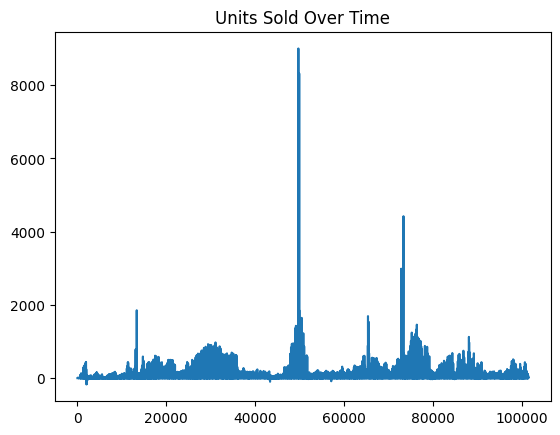

ADF Statistic: -34.267872
p-value: 0.000000


In [6]:
# Plotting the sales data
df['units'].plot(title='Units Sold Over Time')
plt.show()

# Optionally, use statistical test for stationarity checking
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['units'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


In [7]:
# Fitting the ARIMA model
model = ARIMA(df['units'], order=(1, 1, 1))  # These parameters might need adjustment
fitted_model = model.fit()


In [8]:
# Forecasting future sales
forecast = fitted_model.forecast(steps=30)
print(forecast)


101490    7.706503
101491    8.384073
101492    8.464525
101493    8.474078
101494    8.475212
101495    8.475347
101496    8.475363
101497    8.475365
101498    8.475365
101499    8.475365
101500    8.475365
101501    8.475365
101502    8.475365
101503    8.475365
101504    8.475365
101505    8.475365
101506    8.475365
101507    8.475365
101508    8.475365
101509    8.475365
101510    8.475365
101511    8.475365
101512    8.475365
101513    8.475365
101514    8.475365
101515    8.475365
101516    8.475365
101517    8.475365
101518    8.475365
101519    8.475365
Name: predicted_mean, dtype: float64


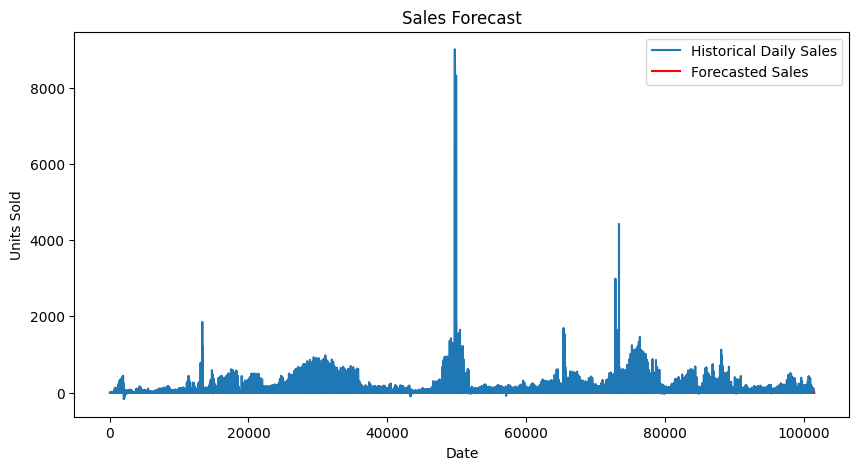

In [9]:
# Plot the historical data and forecasts
plt.figure(figsize=(10,5))
plt.plot(df['units'], label='Historical Daily Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()
